# Понижение размерности данных с помощью метода главных компонент и сингулярного разложения
Группа: ИВТ-М20.<br/>
Студент: Лискунов Роман Геннадьвич

In [1]:
from math import isnan
import matplotlib as mpl
from pprint import pprint
import matplotlib.pyplot as plt
from warnings import filterwarnings
from typing import (
    Any,
    Union, List
)
from pandas import (
    DataFrame,
    read_csv,
    Series,
    read_table
)
from sklearn.linear_model import (
    LogisticRegression,
    SGDClassifier,
    RidgeClassifier
)
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    classification_report
)
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV
)

In [2]:
filterwarnings('ignore')
mpl.style.use(['ggplot'])

## Прочтите данные из файлов

In [3]:
sop1: DataFrame = DataFrame(
    read_table(
        "data/train/SOP1.dat",
        sep="\s+",
        header=0
    )
)
sop1.name = "SOP1"

In [4]:
sop2: DataFrame = DataFrame(
    read_table(
        "data/train/SOP2.dat",
        sep="\s+",
        header=0
    )
)
sop2.name = "SOP2"

In [5]:
sop3: DataFrame = DataFrame(
    read_table(
        "data/train/SOP3.dat",
        sep="\s+",
        header=0
    )
)
sop3.name = "SOP3"

In [6]:
target1: DataFrame = DataFrame(
    read_csv(
        "data/train/target1.csv",
        sep=",",
        header=0
    )
)
target1.name = "target1"

In [7]:
target2: DataFrame = DataFrame(
    read_csv(
        "data/train/target2.csv",
        sep=",",
        header=0
    )
)
target2.name = "target2"

In [8]:
target3: DataFrame = DataFrame(
    read_csv(
        "data/train/target3.csv",
        sep=",",
        header=0
    )
)
target3.name = "target3"

##  Отобразите несколько первых и несколько последних записей.

In [9]:
def printer(variable: DataFrame) -> None:
    pprint(variable.name)
    print(end="\n")
    pprint(variable.head())
    print(end="\n\n")
    pprint(variable.tail())
    print(end="\n\n\n\n")

In [10]:
printer(sop1)

'SOP1'

                       0000  29-08-03  12:34:21  +20C  257  325   16   5  СОП1
1 0 35 202 27 29 35 0     0       255       147    54  119  125  212  17    39
2 0 23 190 27 22 29 0     0       255       147    56   95  156  223  13    27
3 1 0  188 24 10 13 0     0       255       145    59   40  172  254  10     0
4 5 0  183 26 6  1  0     0       255       153    66   22  172  255   7     0
5 4 0  188 32 4  0  0     0       255       157    62   18  170  255  14    21


                        0000  29-08-03  12:34:21  +20C  257  325  16   5  СОП1
1038 0 0 159 36 0  0 0     0       255       175     0    0  127  11   0     1
1039 0 0 189 56 0  0 0     0       255       221     0    0  129   6   0     9
1040 0 0 188 64 16 0 0     0       255       232     0    0  163   0   0    15
1041 0 0 177 43 25 0 0     0       255       181     0    0  198   1  11    13
1042 0 0 177 22 21 0 0     0       255       133     0    0  217   0   0     9






In [11]:
printer(sop2)

'SOP2'

                     0000  29-08-03  13:00:27  +23C  257  325   16   5  СОП2
1 0 0 175 12 0  0 0     0       255       112     0    0  233  173   2    23
2 0 0 159 10 10 0 0     0       255       108     0    0  222  173  10    34
3 0 0 139 25 48 0 0     0       255       145     0    0  230  175  18    18
4 0 0 130 54 61 0 0     0       255       216     0    1  237  185  52    22
5 0 0 110 54 57 0 0     0       236       207     3    4  239  205  43    20


                       0000  29-08-03  13:00:27  +23C  257  325  16   5  СОП2
1035 0 0 0 0  0  0 0      0         0        79     0   28  166   4   0    21
1036 0 0 0 17 0  0 0      0         4       123     0   48  163  16  14     2
1037 0 0 0 17 2  0 0      0         9       122     0   34  125  31   0    11
1038 0 0 0 11 26 0 11     0         0       110     0   27  132  42   0     2
1039 0 0 0 9  43 0 0      0         0       104     0   14  147  40   4    11






In [12]:
printer(sop3)

'SOP3'

                      0000  29-08-03  13:49:13  +21C  257  325   16   5  СОП3
1 0 0 0 10 148 56 0      3        39       118     0    4   88  154  49    14
2 0 0 0 28 129 55 0      0        48       150     0    0   67  140  54     5
3 0 0 0 48 94  58 13     0        16       210     0    0   47   98  59    62
4 0 0 0 54 68  51 0      0        18       244     2    0   37   73  29    12
5 0 0 0 81 46  36 0      0        16       255    11    0   41   58  15     3


                        0000  29-08-03  13:49:13  +21C  257  325  16  5  СОП3
1034 0 0 0 138 76 30 0     0         1       255     0   15    9   0  0     0
1035 0 0 0 134 71 45 0     0        26       255     0   24    2   0  0     0
1036 0 0 0 133 63 50 0     0        12       255     0   27    0   0  1     0
1037 0 0 0 132 41 47 0     0         5       255     0   27    0   0  0     0
1038 0 0 0 130 28 44 0     0         8       255     0   21    0   0  2     0






In [13]:
printer(target1)

'target1'

   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
0              51           42.0               7           L       A
1             200           40.0               6           L       B
2             278           39.0               4           L       A
3             365           43.0               6           L       B
4             460           27.0               5           L       A


   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
3             365           43.0               6           L       B
4             460           27.0               5           L       A
5             845           36.0               4           L       B
6             959           62.0               6           L       A
7             141            NaN               4           T        






In [14]:
printer(target2)

'target2'

   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
0             178           37.0               6           L       B
1             258           38.0               4           L       A
2             337           53.0               5           L       B
3             822           37.0               5           L       B
4             957           48.0               5           L       A


   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
1             258           38.0               4           L       A
2             337           53.0               5           L       B
3             822           37.0               5           L       B
4             957           48.0               5           L       A
5             123            NaN               3           T        






In [15]:
printer(target3)

'target3'

   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
0              26           42.0               5           L       A
1             172           47.0               6           L       B
2             276           55.0               8           L       B
3             795           34.0               8           L       B
4             877           49.0               4           L       A


   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
2             276           55.0               8           L       B
3             795           34.0               8           L       B
4             877           49.0               4           L       A
5             971           50.0               5           L       B
6             112            NaN               4           T        






##  Ящик с усами и временные реализации.

In [16]:
def box(variable: DataFrame) -> None:
    fig, ax = plt.subplots()
    ax.set_title(variable.name)
    ax.boxplot(variable)


def hist(variable: DataFrame) -> None:
    fig, ax = plt.subplots()
    ax.set_title(variable.name)
    ax.hist(variable)

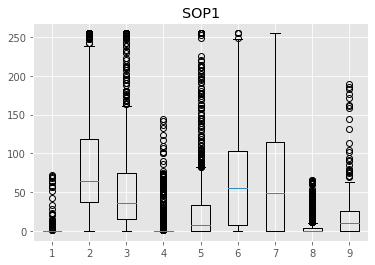

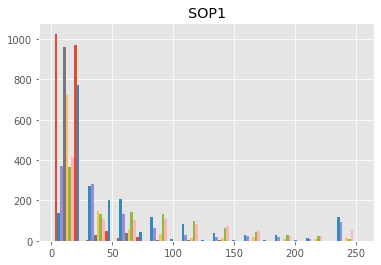

In [17]:
box(sop1)
hist(sop1);

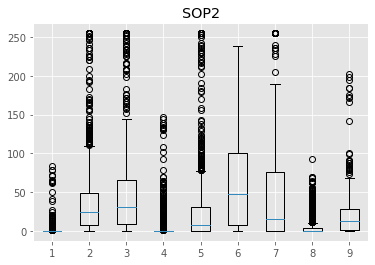

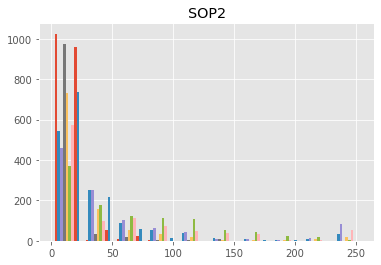

In [18]:
box(sop2)
hist(sop2);

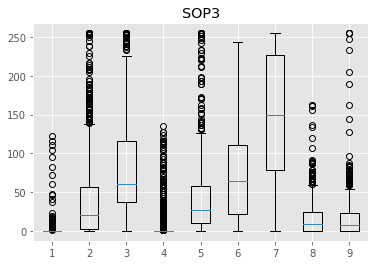

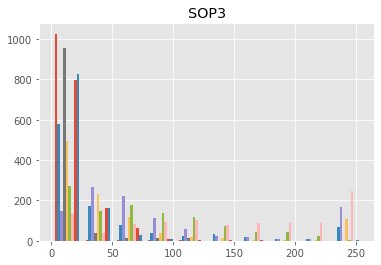

In [19]:
box(sop3)
hist(sop3);

## Вектор с результатами наличия дефектов

In [20]:
array1: Union[Union[list[int], None], Any] = [0] * sop1.count()[0]
array2: Union[Union[list[int], None], Any] = [0] * sop2.count()[0]
array3: Union[Union[list[int], None], Any] = [0] * sop3.count()[0]

In [21]:
ser1: Series = Series(data=array1)
ser2: Series = Series(data=array2)
ser3: Series = Series(data=array3)

In [22]:
def defects(target: DataFrame, series: Series) -> Series:
    for index, row in target.iterrows():
        begin = row['Начало дефекта']
        end = row['Начало дефекта'] + row['Длина дефекта']
        if not isnan(end):
            series.loc[begin:int(end)] = 1
    return series

In [23]:
ser1 = defects(target1, ser1)
ser2 = defects(target2, ser2)
ser3 = defects(target2, ser3)

## Вектор, содержащий значения высоты дефектов в местах их наличия

In [24]:
serH1: Series = Series(data=array1)
serH2: Series = Series(data=array2)
serH3: Series = Series(data=array3)

In [25]:
def defects_height(target: DataFrame, series: Series) -> Series:
    for index, row in target.iterrows():
        begin = row['Начало дефекта']
        end = row['Начало дефекта'] + row['Длина дефекта']
        if not isnan(end):
            series.loc[begin:int(end)] = row['Высота дефекта']
    return series

In [26]:
serH1: Series = defects_height(target1, ser1)
serH2: Series = defects_height(target2, ser2)
serH3: Series = defects_height(target3, ser3)

## Разбиение данных на обучающую и проверочную выборки

In [27]:
sop_train1, sop_test1, target_train1, target_test1 = train_test_split(sop1, ser1, test_size=0.3, train_size=0.7)
sop_train2, sop_test2, target_train2, target_test2 = train_test_split(sop2, ser2, test_size=0.3, train_size=0.7)
sop_train3, sop_test3, target_train3, target_test3 = train_test_split(sop3, ser3, test_size=0.3, train_size=0.7)

## Последовательное применение алгоритмов

In [28]:
def algorithms(sop_train: object, target_train: object) -> object:
    lr: LogisticRegression = LogisticRegression()
    lr.fit(sop_train, target_train)

    sgdc: SGDClassifier = SGDClassifier()
    sgdc.fit(sop_train, target_train)

    rc: RidgeClassifier = RidgeClassifier()
    rc.fit(sop_train, target_train)

    return lr, sgdc, rc

In [29]:
lr1, sgdc1, rc1 = algorithms(sop_train1, target_train1)

In [30]:
lr2, sgdc2, rc2 = algorithms(sop_train2, target_train2)

In [31]:
lr3, sgdc3, rc3 = algorithms(sop_train3, target_train3)

## Оценка качества модели

In [32]:
def estimate(classifier: object, target_test: object, sop_test: object) -> None:
    pred: object = classifier.predict(sop_test)
    print(f"r2_score: {round(r2_score(target_test, pred), 3)}")
    print(f"mean_absolute_error: {round(mean_absolute_error(target_test, pred), 3)}")
    print(f"classification_report: {classification_report(target_test, pred)}")

### LogisticRegression

In [33]:
estimate(
    classifier=lr1,
    target_test=target_test1,
    sop_test=sop_test1
)

r2_score: -0.284
mean_absolute_error: 1.419
classification_report:               precision    recall  f1-score   support

           0       0.77      0.94      0.85       224
           4       0.83      0.20      0.32        25
           5       0.00      0.00      0.00        10
           6       0.57      0.28      0.37        43
           7       0.31      0.36      0.33        11

    accuracy                           0.74       313
   macro avg       0.50      0.36      0.38       313
weighted avg       0.71      0.74      0.69       313



In [34]:
estimate(
    classifier=lr2,
    target_test=target_test2,
    sop_test=sop_test2
)

r2_score: -0.199
mean_absolute_error: 0.974
classification_report:               precision    recall  f1-score   support

           0       0.84      0.94      0.89       248
           4       0.71      0.31      0.43        16
           5       0.33      0.21      0.26        33
           6       0.60      0.20      0.30        15

    accuracy                           0.80       312
   macro avg       0.62      0.42      0.47       312
weighted avg       0.77      0.80      0.77       312



In [35]:
estimate(
    classifier=lr3,
    target_test=target_test3,
    sop_test=sop_test3
)

r2_score: -0.266
mean_absolute_error: 1.728
classification_report:               precision    recall  f1-score   support

           0       0.64      0.93      0.75       187
           1       0.58      0.20      0.30        35
           4       0.33      0.17      0.22        12
           5       0.00      0.00      0.00        30
           6       0.50      0.33      0.40        12
           8       0.71      0.28      0.40        36

    accuracy                           0.63       312
   macro avg       0.46      0.32      0.35       312
weighted avg       0.56      0.63      0.56       312



### SGDClassifier

In [36]:
estimate(
    classifier=sgdc1,
    target_test=target_test1,
    sop_test=sop_test1
)

r2_score: -0.308
mean_absolute_error: 1.46
classification_report:               precision    recall  f1-score   support

           0       0.74      0.98      0.85       224
           4       1.00      0.12      0.21        25
           5       1.00      0.10      0.18        10
           6       0.36      0.12      0.18        43
           7       0.00      0.00      0.00        11

    accuracy                           0.73       313
   macro avg       0.62      0.26      0.28       313
weighted avg       0.69      0.73      0.65       313



In [37]:
estimate(
    classifier=sgdc2,
    target_test=target_test2,
    sop_test=sop_test2
)

r2_score: -0.484
mean_absolute_error: 1.202
classification_report:               precision    recall  f1-score   support

           0       0.85      0.87      0.86       248
           4       0.69      0.56      0.62        16
           5       0.25      0.30      0.27        33
           6       0.00      0.00      0.00        15

    accuracy                           0.75       312
   macro avg       0.45      0.43      0.44       312
weighted avg       0.74      0.75      0.74       312



In [38]:
estimate(
    classifier=sgdc3,
    target_test=target_test3,
    sop_test=sop_test3
)

r2_score: -0.335
mean_absolute_error: 1.795
classification_report:               precision    recall  f1-score   support

           0       0.63      0.97      0.76       187
           1       0.60      0.09      0.15        35
           4       0.50      0.08      0.14        12
           5       0.00      0.00      0.00        30
           6       0.27      0.33      0.30        12
           8       0.00      0.00      0.00        36

    accuracy                           0.61       312
   macro avg       0.33      0.25      0.23       312
weighted avg       0.47      0.61      0.49       312



### RidgeClassifier

In [39]:
estimate(
    classifier=rc1,
    target_test=target_test1,
    sop_test=sop_test1
)

r2_score: -0.316
mean_absolute_error: 1.466
classification_report:               precision    recall  f1-score   support

           0       0.74      0.98      0.84       224
           4       0.83      0.20      0.32        25
           5       0.00      0.00      0.00        10
           6       0.50      0.12      0.19        43
           7       0.00      0.00      0.00        11

    accuracy                           0.73       313
   macro avg       0.41      0.26      0.27       313
weighted avg       0.66      0.73      0.65       313



In [40]:
estimate(
    classifier=rc2,
    target_test=target_test2,
    sop_test=sop_test2
)

r2_score: -0.183
mean_absolute_error: 0.955
classification_report:               precision    recall  f1-score   support

           0       0.81      0.99      0.89       248
           4       1.00      0.25      0.40        16
           5       0.57      0.12      0.20        33
           6       0.00      0.00      0.00        15

    accuracy                           0.81       312
   macro avg       0.60      0.34      0.37       312
weighted avg       0.76      0.81      0.75       312



In [41]:
estimate(
    classifier=rc3,
    target_test=target_test3,
    sop_test=sop_test3
)

r2_score: -0.415
mean_absolute_error: 1.872
classification_report:               precision    recall  f1-score   support

           0       0.61      0.98      0.75       187
           1       0.56      0.14      0.23        35
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        30
           6       1.00      0.08      0.15        12
           8       0.00      0.00      0.00        36

    accuracy                           0.61       312
   macro avg       0.36      0.20      0.19       312
weighted avg       0.47      0.61      0.48       312



## Подбор гиперпараметров

In [42]:
def hyperparameters(sop_train: object, target_train: object) -> object:
    print("LogisticRegression")
    parameters: dict[str, Union[list[str], list[Union[float, int]]]] = {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    }
    grid: GridSearchCV = GridSearchCV(
        LogisticRegression(),
        parameters,
        cv=5
    )
    lr_grid: Union[GridSearchCV, Any] = grid.fit(sop_train, target_train)
    print(lr_grid, end="\n\n\n")

    print("SGDClassifier")
    parameters: dict[str, Union[list[str], list[Union[float, int]]]] = {
        'alpha': [10 ** x for x in range(-6, 1)],
        'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1],
    }
    grid: GridSearchCV = GridSearchCV(
        SGDClassifier(),
        parameters,
        cv=5
    )
    sgdc_grid: Union[GridSearchCV, Any] = grid.fit(sop_train, target_train)
    print(sgdc_grid, end="\n\n\n")

    print("RidgeClassifier")
    parameters: dict[str, Union[list[str], list[Union[float, int]]]] = {
        'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    }
    grid: GridSearchCV = GridSearchCV(
        RidgeClassifier(),
        parameters,
        cv=5
    )
    rc_grid: Union[GridSearchCV, Any] = grid.fit(sop_train, target_train)
    print(rc_grid, end="\n\n\n")

    return lr_grid, sgdc_grid, rc_grid

In [43]:
lr_grid1, sgdc_grid1, rc_grid1 = hyperparameters(
    sop_train=sop_train1,
    target_train=target_train1
)

LogisticRegression
GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})


SGDClassifier
GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95,
                                      1]})


RidgeClassifier
GridSearchCV(cv=5, estimator=RidgeClassifier(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]})




In [44]:
lr_grid2, sgdc_grid2, rc_grid2 = hyperparameters(
    sop_train=sop_train2,
    target_train=target_train2
)

LogisticRegression
GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})


SGDClassifier
GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95,
                                      1]})


RidgeClassifier
GridSearchCV(cv=5, estimator=RidgeClassifier(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]})




In [45]:
lr_grid3, sgdc_grid3, rc_grid3 = hyperparameters(
    sop_train=sop_train3,
    target_train=target_train3
)

LogisticRegression
GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})


SGDClassifier
GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95,
                                      1]})


RidgeClassifier
GridSearchCV(cv=5, estimator=RidgeClassifier(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]})




## Заново обучите модель с подобранными гиперпараметрам

In [46]:
def relearn(classifier: object, target_test: object, sop_test: object) -> None:
    pred: object = classifier.predict(sop_test)
    print(f"r2_score: {round(r2_score(target_test, pred), 3)}")
    print(f"mean_absolute_error: {round(mean_absolute_error(target_test, pred), 3)}")
    print(f"classification_report: {classification_report(target_test, pred)}")

### LogisticRegression

In [47]:
relearn(
    classifier=lr_grid1,
    target_test=target_test1,
    sop_test=sop_test1
)

r2_score: -0.278
mean_absolute_error: 1.412
classification_report:               precision    recall  f1-score   support

           0       0.77      0.94      0.85       224
           4       0.83      0.20      0.32        25
           5       0.00      0.00      0.00        10
           6       0.55      0.28      0.37        43
           7       0.31      0.36      0.33        11

    accuracy                           0.74       313
   macro avg       0.49      0.36      0.37       313
weighted avg       0.70      0.74      0.69       313



In [48]:
relearn(
    classifier=lr_grid2,
    target_test=target_test2,
    sop_test=sop_test2
)

r2_score: -0.178
mean_absolute_error: 0.965
classification_report:               precision    recall  f1-score   support

           0       0.84      0.94      0.89       248
           4       0.58      0.44      0.50        16
           5       0.40      0.24      0.30        33
           6       0.67      0.13      0.22        15

    accuracy                           0.80       312
   macro avg       0.62      0.44      0.48       312
weighted avg       0.77      0.80      0.77       312



In [49]:
relearn(
    classifier=lr_grid3,
    target_test=target_test3,
    sop_test=sop_test3
)

r2_score: -0.267
mean_absolute_error: 1.737
classification_report:               precision    recall  f1-score   support

           0       0.63      0.93      0.75       187
           1       0.47      0.20      0.28        35
           4       0.33      0.17      0.22        12
           5       0.00      0.00      0.00        30
           6       0.50      0.08      0.14        12
           8       0.75      0.25      0.38        36

    accuracy                           0.62       312
   macro avg       0.45      0.27      0.30       312
weighted avg       0.55      0.62      0.54       312



### SGDClassifier

In [50]:
relearn(
    classifier=sgdc_grid1,
    target_test=target_test1,
    sop_test=sop_test1
)

r2_score: -0.178
mean_absolute_error: 1.319
classification_report:               precision    recall  f1-score   support

           0       0.78      0.95      0.85       224
           4       1.00      0.20      0.33        25
           5       0.00      0.00      0.00        10
           6       0.54      0.30      0.39        43
           7       0.42      0.45      0.43        11

    accuracy                           0.75       313
   macro avg       0.55      0.38      0.40       313
weighted avg       0.73      0.75      0.71       313



In [51]:
relearn(
    classifier=sgdc_grid2,
    target_test=target_test2,
    sop_test=sop_test2
)

r2_score: -0.152
mean_absolute_error: 0.929
classification_report:               precision    recall  f1-score   support

           0       0.82      0.99      0.90       248
           4       0.83      0.31      0.45        16
           5       0.57      0.12      0.20        33
           6       0.00      0.00      0.00        15

    accuracy                           0.81       312
   macro avg       0.56      0.36      0.39       312
weighted avg       0.75      0.81      0.76       312



In [52]:
relearn(
    classifier=sgdc_grid3,
    target_test=target_test3,
    sop_test=sop_test3
)

r2_score: -0.421
mean_absolute_error: 1.875
classification_report:               precision    recall  f1-score   support

           0       0.61      0.99      0.75       187
           1       0.75      0.09      0.15        35
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        30
           6       1.00      0.08      0.15        12
           8       0.00      0.00      0.00        36

    accuracy                           0.61       312
   macro avg       0.39      0.19      0.18       312
weighted avg       0.49      0.61      0.47       312



### RidgeClassifier

In [53]:
relearn(
    classifier=rc_grid1,
    target_test=target_test1,
    sop_test=sop_test1
)

r2_score: -0.316
mean_absolute_error: 1.466
classification_report:               precision    recall  f1-score   support

           0       0.74      0.98      0.84       224
           4       0.83      0.20      0.32        25
           5       0.00      0.00      0.00        10
           6       0.50      0.12      0.19        43
           7       0.00      0.00      0.00        11

    accuracy                           0.73       313
   macro avg       0.41      0.26      0.27       313
weighted avg       0.66      0.73      0.65       313



In [54]:
relearn(
    classifier=rc_grid2,
    target_test=target_test2,
    sop_test=sop_test2
)

r2_score: -0.183
mean_absolute_error: 0.955
classification_report:               precision    recall  f1-score   support

           0       0.81      0.99      0.89       248
           4       1.00      0.25      0.40        16
           5       0.57      0.12      0.20        33
           6       0.00      0.00      0.00        15

    accuracy                           0.81       312
   macro avg       0.60      0.34      0.37       312
weighted avg       0.76      0.81      0.75       312



In [55]:
relearn(
    classifier=rc_grid3,
    target_test=target_test3,
    sop_test=sop_test3
)

r2_score: -0.415
mean_absolute_error: 1.872
classification_report:               precision    recall  f1-score   support

           0       0.61      0.98      0.75       187
           1       0.56      0.14      0.23        35
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        30
           6       1.00      0.08      0.15        12
           8       0.00      0.00      0.00        36

    accuracy                           0.61       312
   macro avg       0.36      0.20      0.19       312
weighted avg       0.47      0.61      0.48       312



# Ответы на контрольные вопросы

### 1. Что такое система ПУЗК? Какие основные методы УЗК реализуются в данной системе?

Система ПУЗК - это система полуавтоматического ультразвукового контроля. Она предназначена для выявления продольных и поперечных дефектов, для определения координат и условных размеров дефекта и проведения эксплуатационного контроля.

В состав системы входят 8 преобразователей, располагающихся по обе стороны сварного шва. Часть из них является генераторами, а часть приемниками (усилителями) акустического сигнала, два преобразователя совмещают упомянутые выше функции.

В данной системе реализуются эхо-метод, теневой метод и эхо-контактный.

При эхо-методе преобразователи располагаются с одной стороны сварного соединения. Метод основан на том, что генератор излучает ультразвуковую волну, которая отражается от дефекта и принимается усилителем. В отсутствие дефекта сигнал на приемнике отсутствует.

При теневом методе генератор и приемник располагаются с разных сторон шва. Если дефекта нет, волна без потерь проходит от генератора к приемнику. При наличии дефекта сигнал на приемнике ослаблен из-за рассеивания ультразвуковой волны на дефекте.

При эхо-контактном методе преобразователь генерирует колебания (то есть выступает в роли генератора) и он же принимает отражённые от дефектов эхо-сигналы (как приёмник).

### 2. Чем отличается эхо-метод от теневого и эхо-контактного метода УЗК?

При теневом методе генератор и приемник располагаются с разных сторон шва. Если дефекта нет, волна без потерь проходит от генератора к приемнику. При наличии дефекта сигнал на приемнике ослаблен из-за рассеивания ультразвуковой волны на дефекте.

О наличии дефекта судят по уменьшению амплитуды УЗ-колебаний, прошедших от излучателя к приемнику. Чем больше размер дефекта, тем меньше амплитуда прошедшего сигнала. Можно применять только при двустороннем доступе к изделию.

### 3. Какие типы дефектов можно найти с помощью системы ПУЗК?

С помощью ПУЗК можно выявлять продольные и поперечные дефекты.

Продольные дефекты - дефекты (трещины), расположенные вдоль оси сварного шва.

Поперечные дефекты - дефекты, расположенные перпендикулярно оси сварного шва.

В идеале амплитуда эхо-сигнала при отсутствии дефекта должна равняться нулю, а амплитуда теневого сигнала – 255 усл.ед. При наличии дефекта должно наблюдаться обратное соотношение сигналов по эхо и теневым тактам.
